<h2>Лабораторна робота №6       ФБ-33 Лозенко Павло   </h2>

<h4>Застосування numpy<h4>

Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та
градієнтного спуску.
Постановка задачі:
Ознайомтесь з теоретичним матеріалом. Створіть програму для обчислення лінійної регресії
методом найменших квадратів та градієнтним спуском.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
print("done") 

done


Завдання 1:
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу
результатів.

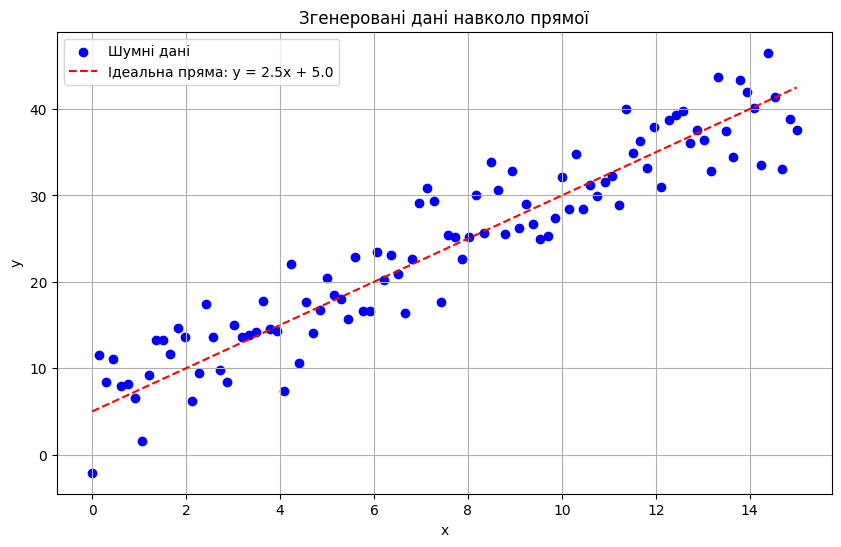

In [30]:
k_true = 2.5
b_true = 5.0
num_points = 100

# Генерація незалежної змінної
xx = np.linspace(0, 15, num_points)

# Ідеальні значення без шуму
yy_ideal = k_true * xx + b_true

# Додавання випадкового шуму (нормальний розподіл)
noise = 4.0 * np.random.randn(num_points)
yy = yy_ideal + noise

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, label='Шумні дані', color='blue')
plt.plot(xx, yy_ideal, label=f'Ідеальна пряма: y = {k_true}x + {b_true}', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Згенеровані дані навколо прямої')
plt.legend()
plt.grid(True)
plt.show()

Візуалізуємо два модель простої лінійної регресії та рівняння прямої

2.  Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k(avg) та b(avg).


In [26]:
def least_squares(x, y):
    x = np.array(x)
    y = np.array(y)

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)

    k = numerator / denominator
    b = y_mean - k * x_mean

    return k, b


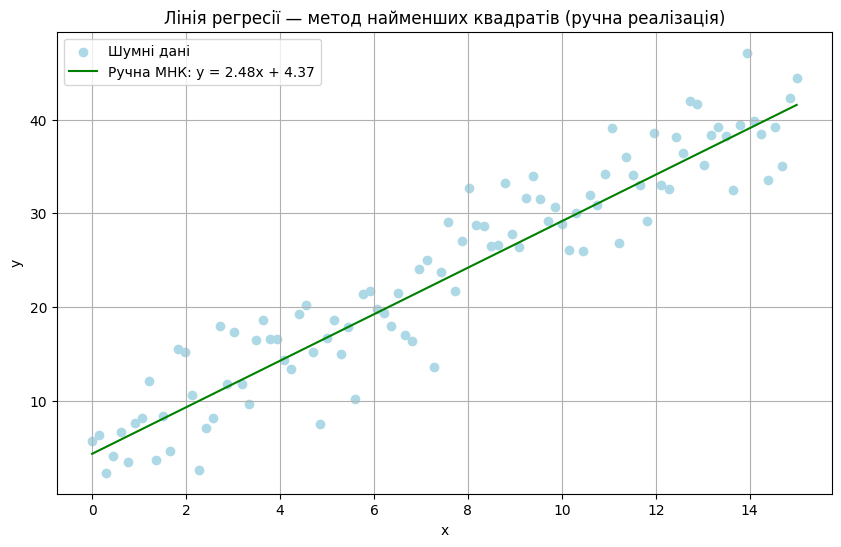

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, label='Шумні дані', color='lightblue')
plt.plot(xx, yy_manual, label=f'Ручна МНК: y = {k_manual:.2f}x + {b_manual:.2f}', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінія регресії — метод найменших квадратів (ручна реалізація)')
plt.legend()
plt.grid(True)
plt.show()

3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [34]:
#ручна реалізація
k_manual, b_manual = least_squares(xx, yy)

#через numpy.polyfit (ступінь 1)
k_numpy, b_numpy = np.polyfit(xx, yy, 1)

# Вивід результатів
print("Початкові параметри:      k =", k_true, ", b =", b_true)

print("\nОцінка (ручна реалізація):")
print(f"  k_manual = {k_manual:.20f}")
print(f"  b_manual = {b_manual:.20f}")

print("\nОцінка (np.polyfit):")
print(f"  k_numpy = {k_numpy:.20f}")
print(f"  b_numpy = {b_numpy:.20f}")


Початкові параметри:      k = 2.5 , b = 5.0

Оцінка (ручна реалізація):
  k_manual = 2.37525728084230136616
  b_manual = 6.27083545791447249940

Оцінка (np.polyfit):
  k_numpy = 2.37525728084230225434
  b_numpy = 6.27083545791446983486


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

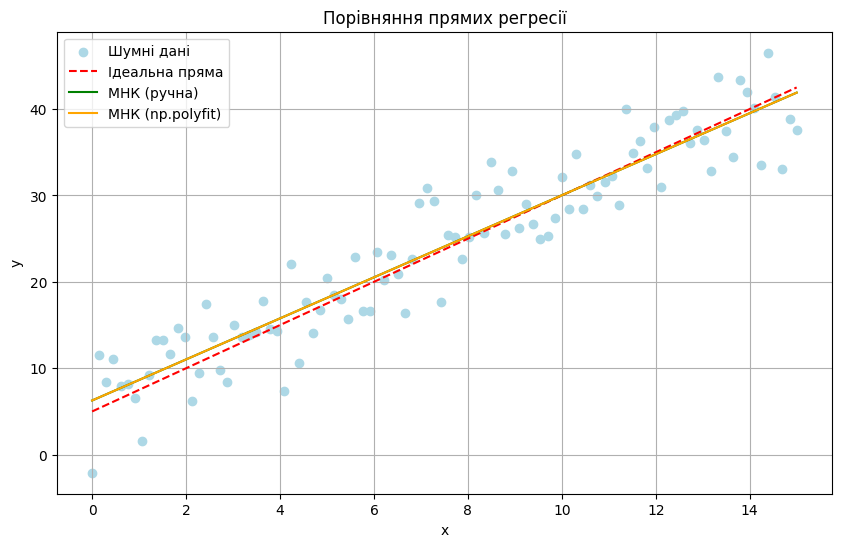

In [32]:
# Прогнозні значення за обома оцінками
yy_manual = k_manual * xx + b_manual
yy_numpy = k_numpy * xx + b_numpy

plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, label='Шумні дані', color='lightblue')
plt.plot(xx, yy_ideal, '--', label='Ідеальна пряма', color='red')
plt.plot(xx, yy_manual, label='МНК (ручна)', color='green')
plt.plot(xx, yy_numpy, label='МНК (np.polyfit)', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння прямих регресії')
plt.legend()
plt.grid(True)
plt.show()


Завдання 2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k(avg) та b(avg). Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [ ]:
    Реалізація градієнтного спуску для знаходження параметрів прямої y = kx + b

    Повертає:
        k, b — оптимальні параметри
        errors — список значень похибки (MSE) на кожній ітерації

In [35]:
def gradient_descent(x, y, learning_rate=0.001, n_iter=1000):

    x = np.array(x)
    y = np.array(y)

    # Початкові значення
    k = 0.0
    b = 0.0

    n = len(x)
    errors = []

    for i in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred

        # MSE
        mse = np.mean(error ** 2)
        errors.append(mse)

        # Градієнти
        dk = -2 * np.mean(x * error)
        db = -2 * np.mean(error)

        # Оновлення параметрів
        k -= learning_rate * dk
        b -= learning_rate * db

    return k, b, errors


 2. Додавання отриманої прямої на графік

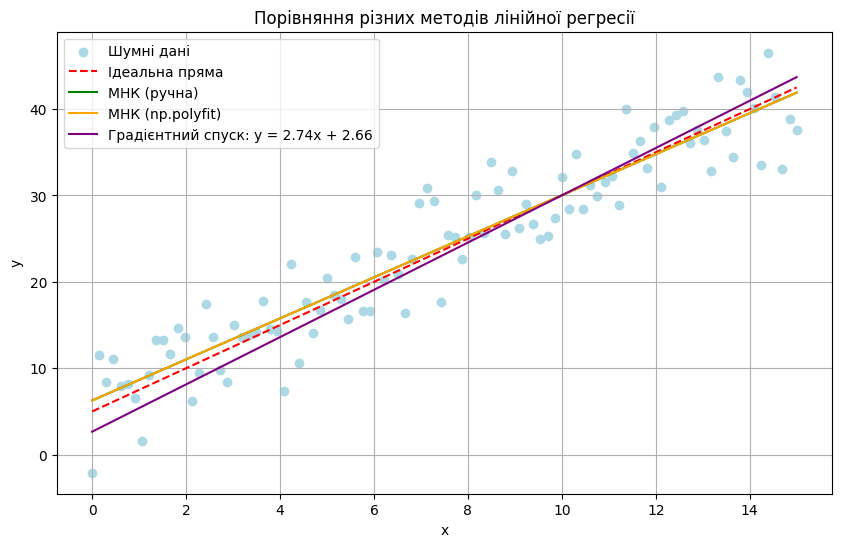

In [36]:
# Викликаємо градієнтний спуск
k_gd, b_gd, errors = gradient_descent(xx, yy, learning_rate=0.001, n_iter=1000)

# Прогноз градієнтного спуску
yy_gd = k_gd * xx + b_gd

# Графік
plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, label='Шумні дані', color='lightblue')
plt.plot(xx, yy_ideal, '--', label='Ідеальна пряма', color='red')
plt.plot(xx, yy_manual, label='МНК (ручна)', color='green')
plt.plot(xx, yy_numpy, label='МНК (np.polyfit)', color='orange')
plt.plot(xx, yy_gd, label=f'Градієнтний спуск: y = {k_gd:.2f}x + {b_gd:.2f}', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння різних методів лінійної регресії')
plt.legend()
plt.grid(True)
plt.show()


3. Графік зміни похибки

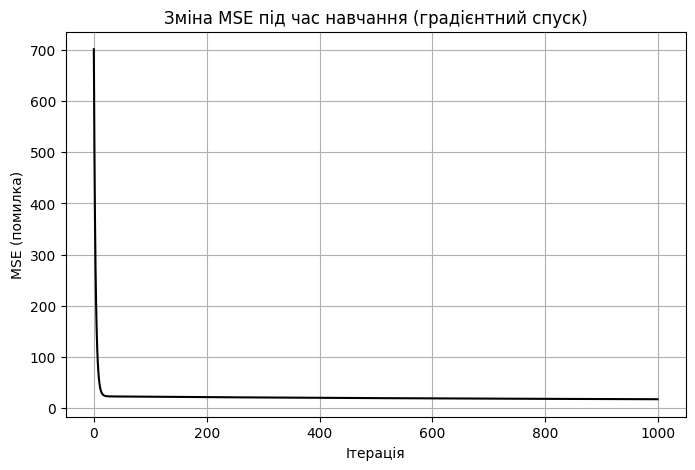

In [37]:
# Побудова графіка похибки від кількості ітерацій
plt.figure(figsize=(8, 5))
plt.plot(errors, color='black')
plt.title("Зміна MSE під час навчання (градієнтний спуск)")
plt.xlabel("Ітерація")
plt.ylabel("MSE (помилка)")
plt.grid(True)
plt.show()


In [ ]:
4. Порівняйте отримані результати з результатами попереднього завдання

In [38]:
print("Порівняння оцінених параметрів:")
print(f"  Початкові (true):         k = {k_true:.10f}, b = {b_true:.10f}")
print(f"  Ручна МНК:                k = {k_manual:.10f}, b = {b_manual:.10f}")
print(f"  np.polyfit:               k = {k_numpy:.10f}, b = {b_numpy:.10f}")
print(f"  Градієнтний спуск:        k = {k_gd:.10f}, b = {b_gd:.10f}")


Порівняння оцінених параметрів:
  Початкові (true):         k = 2.5000000000, b = 5.0000000000
  Ручна МНК:                k = 2.3752572808, b = 6.2708354579
  np.polyfit:               k = 2.3752572808, b = 6.2708354579
  Градієнтний спуск:        k = 2.7360288377, b = 2.6569860567
